![Github_top](https://user-images.githubusercontent.com/33735397/206313977-e67ba652-3340-4a1b-b1d1-141d8d5001f2.PNG)

# Welcome to the Community Streamflow Evaluation System (CSES)

National-scale streamflow modeling remains a modern challenge, as changes in the underlying hydrology from land use and land cover (LULC) change, anthropogenic streamflow modification, and general process components (reach length, hydrogeophysical processes, precipitation, temperature, etc) greatly influence  hydrological modeling.
In a changing climate, there is a need to anticipate flood intensity, impacts of groundwater depletion on streamflow, western mountain low-flow events, eastern rain-on-snow events, storm-induced flooding, and other severe environmental problems that challenge the management of water resources.
Given the National Water Model (NWM) bridges the gap between the spatially coarse USGS streamflow observations by providing a near-continuous 2.7 million reach predictions of streamflow, there lies the potential to improve upon the capabilities of the model by characterizing predictive performance across the heterogeneity of processes and land covers present at the national scale. 
The Python-based Research-Oriented Streamflow Evaluation Tool (ROSET) package provides a tool to evaluate national hydrography dataset (nhd) based model outputs with colocated USGS/NWIS streamflow monitoring stations (parameter: 060). 
The package contains three key methods for evaluation: state-based LULC, HUC level analysis, and USGS station-based analysis.
Below is a description of each method and application.
While designed to use the NWM version 2.1 retrospective dataset, with minimal modification the tool should be able to take in other model formulations.
By using the ROSET, researchers can identify locations where a model may benefit from further training/calibration/parameterization or a need for new model processes/features (e.g., integration of reservoir release operations) to ultimately create new post-processing methods and/or hydrological modeling formulations to improve streamflow prediction capabilities with respect to modeling needs (e.g., stormflow, supply, emergency management, flooding, etc).   


In [1]:
import CSES
import os
import warnings
warnings.filterwarnings("ignore")
#set path directory
cwd = os.getcwd()

# Streamflow Evaluator: State Class

This section of code allows the user to evaluate modeled streamflow with observed in situ NWIS monitoring sites.
Please enter a start date, end date, frequency, state of interest, and model to compare (NWM v2.1 is set up).
Select the below classes to evaluate model performance, set the classification to the provided term

Tell the model what type of classification you are interested in:

* Drainage area breaks: <span style="color:red">"Drainage_area_mi2" </span>
* Elevation breaks: <span style="color:red">"Mean_Basin_Elev_ft"</span>
* Forest area breaks: <span style="color:red">"Perc_Forest"</span>
* Developed area breaks: <span style="color:red">"Perc_Develop"</span>
* Impervious area breaks: <span style="color:red">"Perc_Imperv"</span>
* Herbacious area breaks: <span style="color:red">"Perc_Herbace"</span>
* Slope area > 30 degrees breaks: <span style="color:red">"Perc_Slop_30"</span>
* Precipitation breaks: <span style="color:red">"Mean_Ann_Precip_in"</span>
* low flows: <span style="color:red">"Ann_low_cfs"</span>
* Mean flows: <span style="color:red">"Ann_mean_cfs"</span>
* High flows: <span style="color:red">"Ann_hi_cfs"</span>

![LULC_Eval_top_image](https://user-images.githubusercontent.com/33735397/206321617-354fbbe1-3a61-4be2-8234-daf95fd4d926.PNG)


In [2]:
#Set desired start and end date, state, model for comparision, and LULC class
startDT ='2011-5-24'
endDT ='2011-8-24' #last day of data is 2020-09-28
state = 'al'
#the model name must match with the folder name in which model predictions are in.
model = 'NWM_v2.1'
classification = 'Drainage_area_mi2'

#Inititate Streamflow Evaluator
State_Eval = CSES.LULC_Eval(model, state, startDT, endDT, cwd)

#get state specific NWIS locations
State_Eval.get_NWIS()
State_Eval.get_NHD_Model_info()
State_Eval.class_eval_state(classification)

Getting NWIS Streamstats
Getting NHD reaches
Categorical breaks for  Drainage_area_mi2 :  [3.86e-05, 149.0, 498.0, 1670.0, 2650.0, 5750.0]


## Interactive Streamflow plotting.

Categorical break: 
* <span style="color:red">very small</span>: State_Eval.df_vsmall
* <span style="color:red">small</span>: State_Eval.df_small
* <span style="color:red">medium</span>: State_Eval.df_medium
* <span style="color:red">large</span>: State_Eval.df_large
* <span style="color:red">very large</span>: State_Eval.df_vlarge
    
Get a map of locations with plots of NWM vs. OBS
Set frequency for graph:
* <span style="color:red">'D'</span>: Daily
* <span style="color:red">'M'</span>: monthly, 
* <span style="color:red">'Q'</span>: quarterly, 
* <span style="color:red">'A'</span>: annual

Set supply = <span style="color:green"> **True** </span> to evaluate cumulative water year totals or <span style = "color:green"> **False** </span> to look at desired temporal resolution

In [3]:
#Input temporal frequency, DF size, and DF size term -- make site name appear with mouse hover
State_Eval.Map_Plot_Eval('D', State_Eval.df_small, 'small', supply = False)

Getting  NWM_v2.1  data


100% |########################################################################|


Getting NWIS data


100% |########################################################################|


Plotting monitoring station locations


## Interactive Plotting 

Running the dataframe will show all properties and sites
Set frequency for graph:
* <span style="color:red">'D'</span>: Daily
* <span style="color:red">'M'</span>: monthly, 
* <span style="color:red">'Q'</span>: quarterly, 
* <span style="color:red">'A'</span>: annual

Set supply = <span style="color:green"> **True** </span> to evaluate cumulative water year totals or <span style = "color:green"> **False** </span> to look at desired temporal resolution

,NWIS_site_id,NHD_reachid,Location,RMSE,MaxError,MAPE,KGE,Drainage_area_mi2,Mean_Basin_Elev_ft,Perc_Forest,Perc_Imperv,Perc_Herbace,Mean_Ann_Precip_in,Ann_low_cfs,Ann_mean_cfs,Ann_hi_cfs
0,03574500,19621426,PAINT ROCK RIVER NEAR WOODVILLE AL,449,628,5.355730,0.914583,321.0,0.0,0.0,0.17,0.0,0.0,179.8,698.0,1095.0
1,02377570,2171465,"STYX RIVER NEAR ELSANOR, AL.",3285,3704,26.024372,0.843396,191.0,0.0,0.0,0.74,0.0,0.0,157.9,439.0,815.9
2,02427250,21457950,"PINE BARREN CREEK NEAR SNOW HILL, AL.",766,769,19.852828,0.842177,261.0,0.0,0.0,0.16,0.0,0.0,109.2,337.0,521.8
3,02415000,22035157,HILLABEE CREEK NEAR HACKNEYVILLE AL,1906,2100,38.666478,0.681499,190.0,0.0,0.0,0.33,0.0,0.0,91.0,302.0,578.4
4,02374500,933140017,MURDER CREEK NEAR EVERGREEN AL,2457,3068,44.951281,0.681060,176.0,0.0,0.0,0.38,0.0,0.0,96.9,283.0,535.6
5,02464000,18229143,NORTH RIVER NEAR SAMANTHA AL,1349,1903,47.524166,0.669700,223.0,0.0,0.0,0.29,0.0,0.0,87.1,388.0,781.7
6,02453000,18591938,BLACKWATER CREEK NEAR MANCHESTER AL,3110,3485,55.178958,0.609710,182.0,0.0,0.0,0.66,0.0,0.0,107.5,358.0,525.1
7,02408540,22274612,HATCHET CREEK BELOW ROCKFORD AL,2899,3380,34.472752,0.606095,262.0,0.0,0.0,0.29,0.0,0.0,123.4,401.0,756.6
8,02404400,22204871,CHOCCOLOCCO CREEK AT JACKSON SHOAL NR LINCOLN AL,9535,13161,21.608151,0.563365,480.0,0.0,0.0,2.60,0.0,0.0,229.9,721.0,1203.0
9,02373000,2402121,SEPULGA RIVER NEAR MCKENZIE AL,1582,2163,91.104471,0.558343,470.0,0.0,0.0,0.67,0.0,0.0,115.7,664.0,1354.0


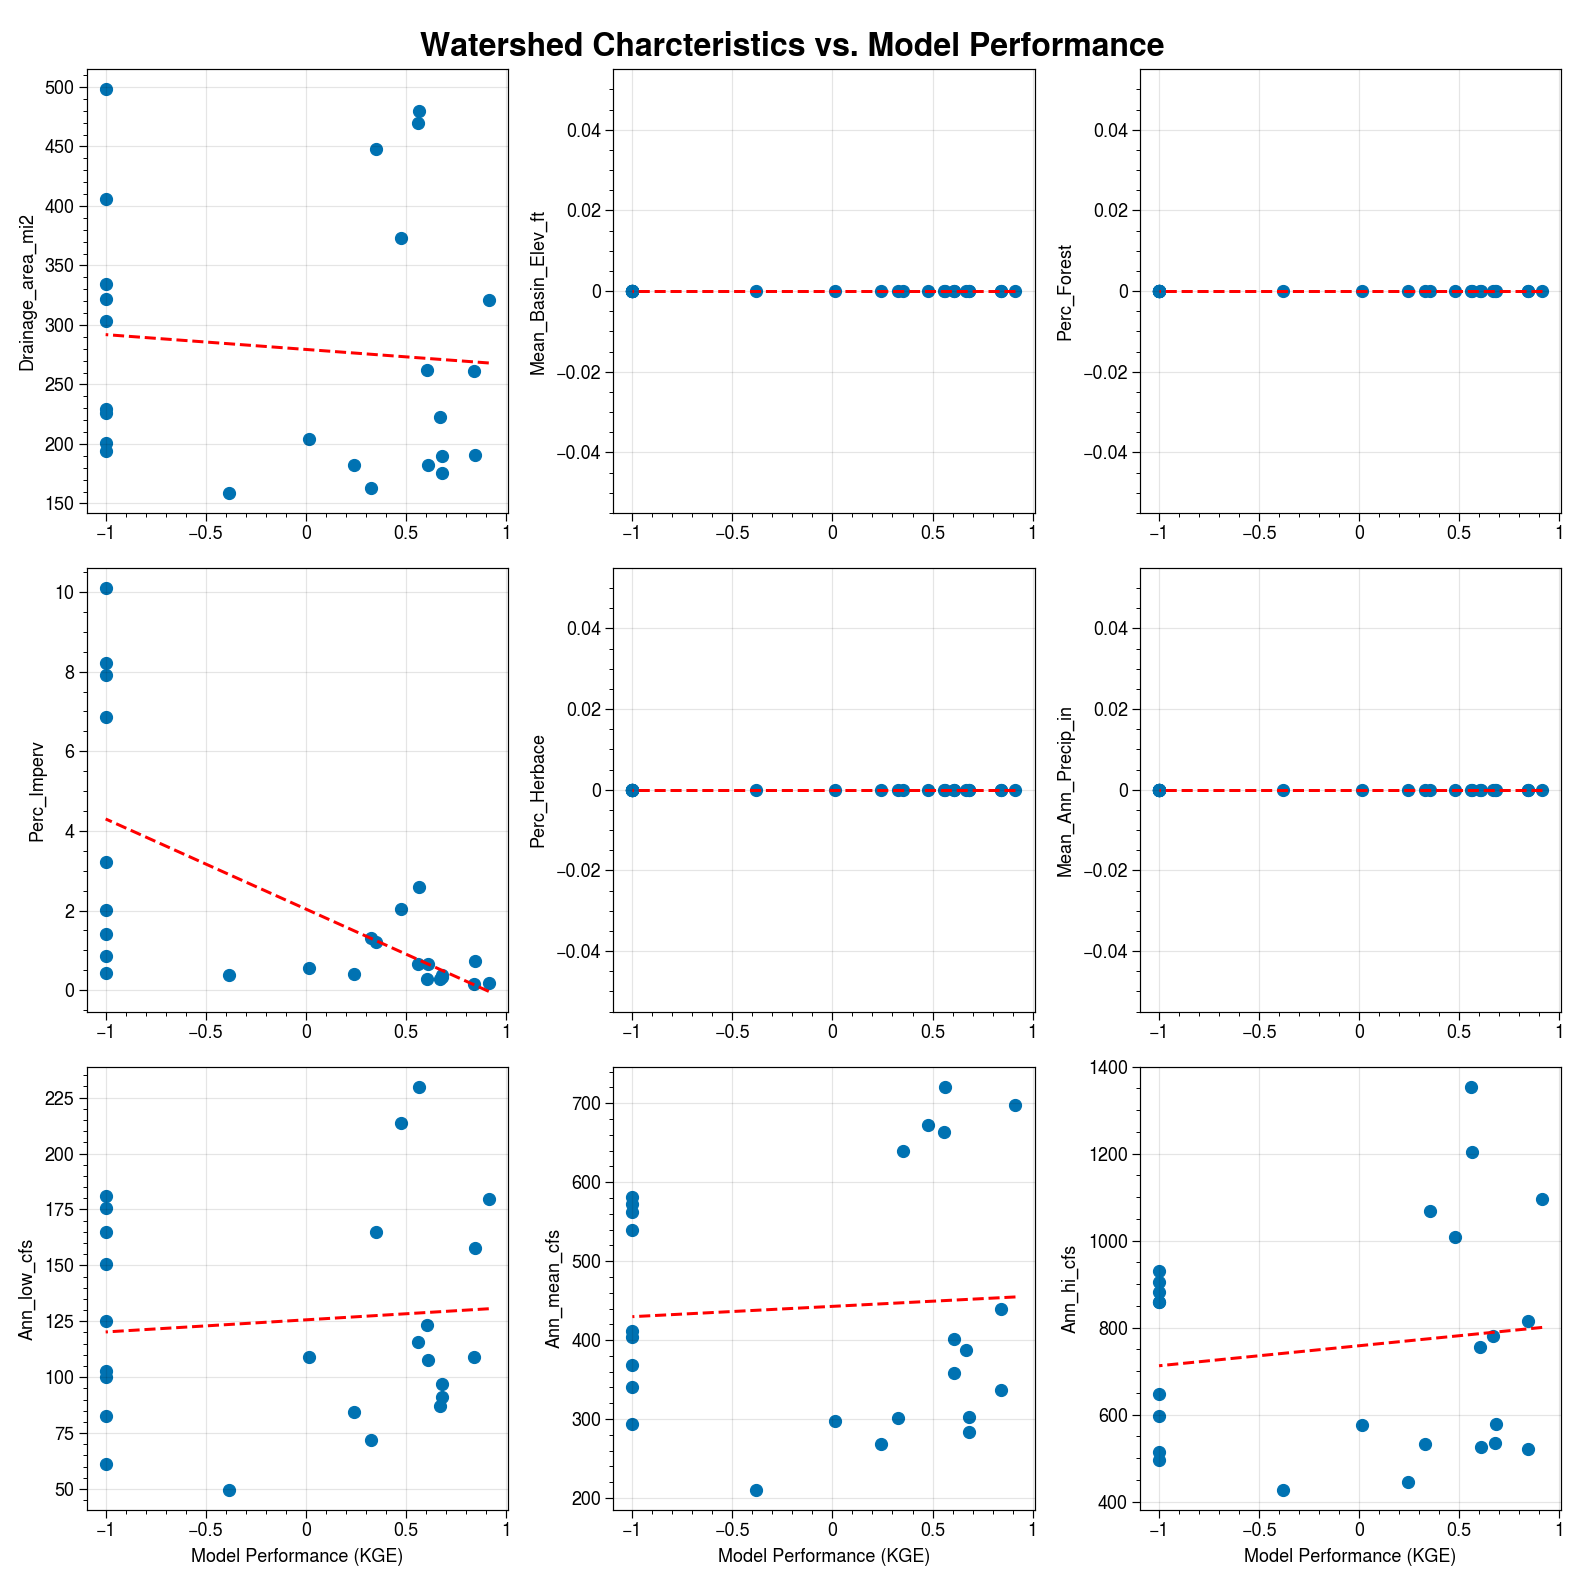

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_03574500                   :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_NHD_19621426 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_02377570                  :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_NHD_2171465 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                               :Rectangles   [x0,y0,x1,y1]
      .Text.I                                     :Text   [x,y]
      .Text.II                                    :Text   [x,y]
      .Text.III                                   :Text   [x,y]
      .Text.IV                                    :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_02427250                   :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_NHD_21457950 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_02415000                   :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_NHD_22035157 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_02374500                    :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_NHD_933140017 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                                 :Rectangles   [x0,y0,x1,y1]
      .Text.I                                       :Text   [x,y]
      .Text.II                                      :Text   [x,y]
      .Text.III                                     :Text   [x,y]
      .Text.IV                                      :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_02464000                   :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_NHD_18229143 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_02453000                   :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_NHD_18591938 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_02408540                   :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_NHD_22274612 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_02404400                   :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_NHD_22204871 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_02373000                  :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_NHD_2402121 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                               :Rectangles   [x0,y0,x1,y1]
      .Text.I                                     :Text   [x,y]
      .Text.II                                    :Text   [x,y]
      .Text.III                                   :Text   [x,y]
      .Text.IV                                    :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_03575100                   :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_NHD_19621328 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_02412000                   :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_NHD_15810691 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_03586500                   :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_NHD_19581387 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_02374745                  :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_NHD_2413254 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                               :Rectangles   [x0,y0,x1,y1]
      .Text.I                                     :Text   [x,y]
      .Text.II                                    :Text   [x,y]
      .Text.III                                   :Text   [x,y]
      .Text.IV                                    :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_02422500                   :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_NHD_21676818 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_02448900                   :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_NHD_18604744 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_02423555                   :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_NHD_21655896 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_02423500                   :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_NHD_21656498 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_02363000                  :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_NHD_2210130 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                               :Rectangles   [x0,y0,x1,y1]
      .Text.I                                     :Text   [x,y]
      .Text.II                                    :Text   [x,y]
      .Text.III                                   :Text   [x,y]
      .Text.IV                                    :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_02413300                   :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_NHD_15811667 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_02423496                   :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_NHD_21655568 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_02455000                   :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_NHD_18563487 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_02405500                   :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_NHD_22206103 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_02342500                  :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_NHD_3435970 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                               :Rectangles   [x0,y0,x1,y1]
      .Text.I                                     :Text   [x,y]
      .Text.II                                    :Text   [x,y]
      .Text.III                                   :Text   [x,y]
      .Text.IV                                    :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_02423425                   :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_NHD_21655464 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

In [4]:

State_Eval.Interactive_Model_Eval('Q', supply = True)

Use State_Eval.Eval.NWIS_site_id if you would like to get the respective NWIS/Modeled site/reaches to plug into the Reach Evaluator class

# Streamflow evaluation: HUC Class

This section of code allows the user to evaluate modeled streamflow with observed in situ NWIS monitoring sites 
for a watershed(s) of interest. The user can input multiple watersheds (e.g., Great Salt lake: ['1601', '1602']).
Enter a start date, end date, watersheds and model to compare (NWM v2.1 is set up).
NWM retrospective data spans from 1980 - 2020, USGS/NWIS data is location dependent

Use [The National Map Watershed Boundary Dataset (WBD)]() to identify the HUC size and unit code of interestto locate HUC of interest.

![HUC_Eval_top](https://user-images.githubusercontent.com/33735397/206322410-ea0e210c-c805-4599-ad6b-704c76ba42ce.PNG)


In [ ]:
#Enter a starting date, model for evaluation, and the respectrive HUC id(s)

startDT ='2015-4-01'
endDT ='2015-10-31'
model = 'NWM_v2.1'
HUCids = ['1601', '1602'] #must be in brackets, add multiple HUCs to complete a watershed (e.g. GSL basin), East vs. West. etc
#0802 causing issues, is the state there?
#Initiate function
HUC_Eval = ROSET_AWS.HUC_Eval(model, HUCids, startDT, endDT, cwd)


In [ ]:
#Match NWIS locations within HUC watershed
HUC_Eval.Join_WBD_StreamStats()

In [ ]:
#Get NWM reaches for each NWIS monitoring station
HUC_Eval.get_NHD_Model_info()

#Get NWM and NWIS data to compare
HUC_Eval.prepare_comparison() # run the apply function to not have to run it during evaluation

## Interactive plotting on map
Set frequency for graph:
* <span style="color:red">'D'</span>: Daily
* <span style="color:red">'M'</span>: monthly, 
* <span style="color:red">'Q'</span>: quarterly, 
* <span style="color:red">'A'</span>: annual

Set supply = <span style="color:green"> **True** </span> to evaluate cumulative water year totals or <span style = "color:green"> **False** </span> to look at desired temporal resolution

In [ ]:
#Run Map function
HUC_Eval.Map_Plot_Eval('D', supply = True)

## Interactive time series plotting
Set frequency for graph:
* <span style="color:red">'D'</span>: Daily
* <span style="color:red">'M'</span>: monthly, 
* <span style="color:red">'Q'</span>: quarterly, 
* <span style="color:red">'A'</span>: annual

Set supply = <span style="color:green"> **True** </span> to evaluate cumulative water year totals or <span style = "color:green"> **False** </span> to look at desired temporal resolution

In [ ]:
#Plot evaluation
HUC_Eval.Interactive_Model_Eval('D', supply = False)

# Streamflow Evaluation: Reach Class

This section of code allows the user to evaluate modeled streamflow with selected NWIS monitoring sites of interest. 
The user can input multiple USGS sites (e.g., ['02378780', '02339495', '02342500'])
Please enter a start date, end date, and model to compare (NWM v2.1 is set up).
NWM retrospective data spans from 1980 - 2020, USGS/NWIS data is location dependent.

![REach_Eval_top](https://user-images.githubusercontent.com/33735397/206324095-dcc59508-bf4c-43a8-9a19-4fc5c573e205.PNG)

In [ ]:
#Put in model of interest for evaluation, NWIS/USGS site id(s), and the start/end date

model = 'NWM_v2.1'
#example with list of USGS sites along the Provo River, Utah
#NWIS_list = ['10155000', '10155200'] #, '10155500', '10155200', '10154200']
NWIS_list = ['10126000', '10130500', '10134500', '10136500', '10137500', '10141000', '10155000', '10164500', '10171000' ] # 02450000 is a bad site and good for breaking ROSET
#plot list of top performing sites
Eval_Metric = 'KGE'
#Performance_Threshold = 0.70
#NWIS_list = HUC_Eval.Eval[HUC_Eval.Eval[Eval_Metric] >Performance_Threshold]['NWIS_site_id'].values.tolist()

startDT ='2020-1-01'
endDT ='2020-9-30'
#set path directory
cwd = os.getcwd()


Reach_Eval = ROSET_AWS.Reach_Eval(model , NWIS_list, startDT, endDT, cwd)

#Get Streamstats and colocated NHD reaches
Reach_Eval.get_NHD_Model_info()

#Get USGS and NWM data
Reach_Eval.prepare_comparison()

## Interactive plotting on map
Set frequency for graph:
* <span style="color:red">'D'</span>: Daily
* <span style="color:red">'M'</span>: monthly, 
* <span style="color:red">'Q'</span>: quarterly, 
* <span style="color:red">'A'</span>: annual

Set supply = <span style="color:green"> **True** </span> to evaluate cumulative water year totals or <span style = "color:green"> **False** </span> to look at desired temporal resolution

In [ ]:
#Plot the locations
Reach_Eval.Map_Plot_Eval('D', supply = True)

## Interactive time series plotting
Set frequency for graph:
* <span style="color:red">'D'</span>: Daily
* <span style="color:red">'M'</span>: monthly, 
* <span style="color:red">'Q'</span>: quarterly, 
* <span style="color:red">'A'</span>: annual

Set supply = <span style="color:green"> **True** </span> to evaluate cumulative water year totals or <span style = "color:green"> **False** </span> to look at desired temporal resolution

In [ ]:
#Holoviews plots.
freq = 'M'

Reach_Eval.Interactive_Model_Eval(freq, supply =True)